<a href="https://colab.research.google.com/github/HimabinduKandyala/M/blob/main/heart_congenital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import seaborn as sns
import warnings
from sklearn.utils import resample
warnings.filterwarnings(action='ignore')

In [3]:
df=pd.read_csv("/content/critically ill pediatric patients in PICU (1).csv")

In [4]:
df

,No. Patients,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,1,2 months,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,1,2 months,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,1,2 months,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,1,2 months,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,1,2 months,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,90,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:40,105,78,0,46,33,37
94674,90,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:41,105,78,0,46,33,37
94675,90,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:42,40,60,0,0,0,0
94676,90,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:43,20,30,0,0,0,0


In [5]:
df['No. Patients'].nunique

<bound method IndexOpsMixin.nunique of 0         1
1         1
2         1
3         1
4         1
         ..
94673    90
94674    90
94675    90
94676    90
94677    90
Name: No. Patients, Length: 94678, dtype: int64>

In [6]:
df.drop(columns=['No. Patients'],inplace=True)

In [7]:
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,2 months,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,2 months,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,2 months,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,2 months,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,2 months,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:40,105,78,0,46,33,37
94674,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:41,105,78,0,46,33,37
94675,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:42,40,60,0,0,0,0
94676,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:43,20,30,0,0,0,0


In [8]:
df.isna().sum()

,0
Age,0
Weight (Kg),0
Height (cms),7404
Genero,0
Diagnosis,0
Outcome,0
Hour event (seconds),0
Heart Rate,0
oxygen saturation,0
Respiratory Rate,0


In [9]:
df.dropna(inplace=True)

In [10]:
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,2 months,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,2 months,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,2 months,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,2 months,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,2 months,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:40,105,78,0,46,33,37
94674,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:41,105,78,0,46,33,37
94675,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:42,40,60,0,0,0,0
94676,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:43,20,30,0,0,0,0


In [11]:
df.duplicated().sum()

np.int64(1136)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,2 months,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,2 months,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,2 months,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,2 months,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,2 months,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:40,105,78,0,46,33,37
94674,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:41,105,78,0,46,33,37
94675,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:42,40,60,0,0,0,0
94676,6 months,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:43,20,30,0,0,0,0


In [14]:
df.describe()

,Weight (Kg),Height (cms),Heart Rate,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
count,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000
mean,15.541358,86.863382,130.540110,30.294597,97.677715,59.732069,72.398129
std,16.483811,36.408713,29.792703,14.277330,20.600518,16.658915,17.082028
min,4.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,55.000000,116.000000,24.000000,86.000000,48.000000,60.000000
50%,8.000000,67.000000,137.000000,30.000000,100.000000,60.000000,73.000000
75%,14.000000,100.000000,151.000000,34.000000,110.000000,72.000000,85.000000
max,65.000000,170.000000,205.000000,400.000000,163.000000,112.000000,124.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86138 entries, 0 to 94677
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         86138 non-null  object 
 1   Weight (Kg)                 86138 non-null  float64
 2   Height (cms)                86138 non-null  float64
 3   Genero                      86138 non-null  object 
 4   Diagnosis                   86138 non-null  object 
 5   Outcome                     86138 non-null  object 
 6   Hour event (seconds)        86138 non-null  object 
 7   Heart Rate                  86138 non-null  int64  
 8   oxygen saturation           86138 non-null  object 
 9   Respiratory Rate            86138 non-null  int64  
 10  Systolic Blood Pressure     86138 non-null  int64  
 11  Diastolic Blood Pressure,   86138 non-null  int64  
 12  Mean Blood Pressure         86138 non-null  int64  
dtypes: float64(2), int64(5), object(6)
m

In [16]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)
cat_cols

['Age',
 'Genero',
 'Diagnosis',
 'Outcome',
 'Hour event (seconds)',
 'oxygen saturation']

In [17]:
df['Age']

,Age
0,2 months
1,2 months
2,2 months
3,2 months
4,2 months
...,...
94673,6 months
94674,6 months
94675,6 months
94676,6 months


In [18]:
df['Age'] = df['Age'].str.extract('(\d+)').astype(int)
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Hour event (seconds),Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure
0,2,5.5,60.0,female,myocarditis,survived,18:52,138,92,36,100,56,73
1,2,5.5,60.0,female,myocarditis,survived,18:53,142,92,31,99,53,69
2,2,5.5,60.0,female,myocarditis,survived,18:54,139,92,31,99,52,68
3,2,5.5,60.0,female,myocarditis,survived,18:55,142,92,29,97,51,66
4,2,5.5,60.0,female,myocarditis,survived,18:56,144,92,25,102,56,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,6,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:40,105,78,0,46,33,37
94674,6,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:41,105,78,0,46,33,37
94675,6,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:42,40,60,0,0,0,0
94676,6,8.0,67.0,male,bronchiolitis-prematurity-heart disease,dead,7:43,20,30,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86138 entries, 0 to 94677
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         86138 non-null  int64  
 1   Weight (Kg)                 86138 non-null  float64
 2   Height (cms)                86138 non-null  float64
 3   Genero                      86138 non-null  object 
 4   Diagnosis                   86138 non-null  object 
 5   Outcome                     86138 non-null  object 
 6   Hour event (seconds)        86138 non-null  object 
 7   Heart Rate                  86138 non-null  int64  
 8   oxygen saturation           86138 non-null  object 
 9   Respiratory Rate            86138 non-null  int64  
 10  Systolic Blood Pressure     86138 non-null  int64  
 11  Diastolic Blood Pressure,   86138 non-null  int64  
 12  Mean Blood Pressure         86138 non-null  int64  
dtypes: float64(2), int64(6), object(5)
m

In [20]:
df['Age'].value_counts()

,count
Age,
4,19471
2,12876
5,10202
3,9898
6,9870
14,5260
7,4141
12,2973
8,2700


In [21]:
df['Genero'].value_counts()

,count
Genero,
male,52618
female,33520


In [22]:
#Male -1 and Female - 0
df['Genero']=df['Genero'].replace(['male','female'],[1,0])

In [23]:
df['Genero'].value_counts()

,count
Genero,
1,52618
0,33520


In [24]:
df['Diagnosis'].value_counts()
#needs to be label encoded

,count
Diagnosis,
pneumonia,10301
bronchiolitis,9031
myocarditis,3713
febrile neutropenia,3059
ARDS,2832
sepsis,2364
Pulmonary hypertension severe,2345
diabetic ketoacidosis,1929
abdominal sepsis,1847


In [25]:
df['Outcome'].value_counts()

,count
Outcome,
survived,66171
dead,19967


In [26]:
# Dead- 1 and Survived -0
df['Outcome']=df['Outcome'].replace(['survived','dead'],[0,1])
df['Outcome'].value_counts()

,count
Outcome,
0,66171
1,19967


In [27]:
df['Hour event (seconds)']

,Hour event (seconds)
0,18:52
1,18:53
2,18:54
3,18:55
4,18:56
...,...
94673,7:40
94674,7:41
94675,7:42
94676,7:43


In [28]:
df['Hour event (seconds)'] = pd.to_datetime(df['Hour event (seconds)'], format="mixed", errors='coerce')
if df['Hour event (seconds)'].isnull().any():
    df['Hour event (seconds)'] = pd.to_datetime(df['Hour event (seconds)'].fillna(df['Hour event (seconds)'].str.slice(0, 5)), errors='coerce')
# Convert times to minutes
df['Hour event in Minutes'] = df['Hour event (seconds)'].dt.hour * 60 + df['Hour event (seconds)'].dt.minute

In [29]:
df['Hour event in Minutes']

,Hour event in Minutes
0,1132
1,1133
2,1134
3,1135
4,1136
...,...
94673,460
94674,461
94675,462
94676,463


In [30]:
df.drop(columns=['Hour event (seconds)'],inplace=True)

In [31]:
cat_cols

['Age',
 'Genero',
 'Diagnosis',
 'Outcome',
 'Hour event (seconds)',
 'oxygen saturation']

In [32]:
df['oxygen saturation'].unique()

array(['92', '94', '93', '91', '95', '96', '87', '90', '85', '89', '88',
       '86', '84', '81', '77', '82', '80', '74', '69', '99', '100', '78',
       '76', '75', '73', '66', '79', '64', '97', '98', '83', '70', '72',
       '61', '52', '50', '62', '71', '23', '68', '65', '3', '0', '34',
       '31', '35', '37', '38', '45', '55', '60', '20', '67', '40', '57',
       '58', '44', '56', '53', '63', '54', '59', '51', '41', '46', '47',
       '33', '32', '25', '10', '11', '27', '22', '14', '42', '48', '28',
       '1', '8', '945', 'NORMAL', '39', '30'], dtype=object)

In [33]:
#Normal Oxygen Saturation level is 95
df['oxygen saturation']=df['oxygen saturation'].replace(['NORMAL'],[95])

In [34]:
df['oxygen saturation']=df['oxygen saturation'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86138 entries, 0 to 94677
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         86138 non-null  int64  
 1   Weight (Kg)                 86138 non-null  float64
 2   Height (cms)                86138 non-null  float64
 3   Genero                      86138 non-null  int64  
 4   Diagnosis                   86138 non-null  object 
 5   Outcome                     86138 non-null  int64  
 6   Heart Rate                  86138 non-null  int64  
 7   oxygen saturation           86138 non-null  int64  
 8   Respiratory Rate            86138 non-null  int64  
 9   Systolic Blood Pressure     86138 non-null  int64  
 10  Diastolic Blood Pressure,   86138 non-null  int64  
 11  Mean Blood Pressure         86138 non-null  int64  
 12  Hour event in Minutes       86138 non-null  int32  
dtypes: float64(2), int32(1), int64(9), o

# Div 2

Text(0.5, 1.0, 'Height')

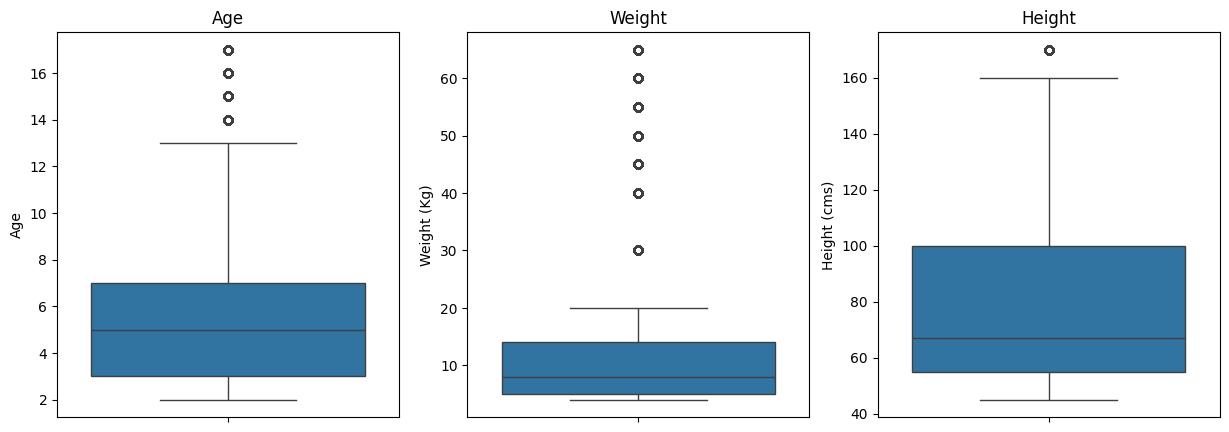

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df['Age'])
plt.title("Age")

plt.subplot(1,3,2)
sns.boxplot(df['Weight (Kg)'])
plt.title("Weight")

plt.subplot(1,3,3)
sns.boxplot(df['Height (cms)'])
plt.title("Height")

Text(0.5, 1.0, 'Respiratory Rate')

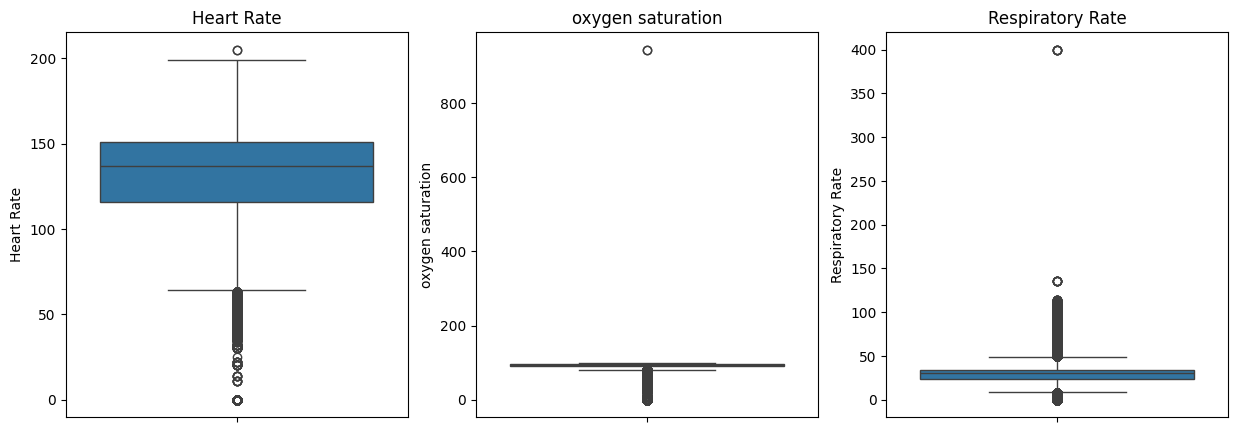

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df['Heart Rate'])
plt.title("Heart Rate")

plt.subplot(1,3,2)
sns.boxplot(df['oxygen saturation'])
plt.title("oxygen saturation")

plt.subplot(1,3,3)
sns.boxplot(df['Respiratory Rate'])
plt.title("Respiratory Rate")

Text(0.5, 1.0, 'Hour event in Minutes')

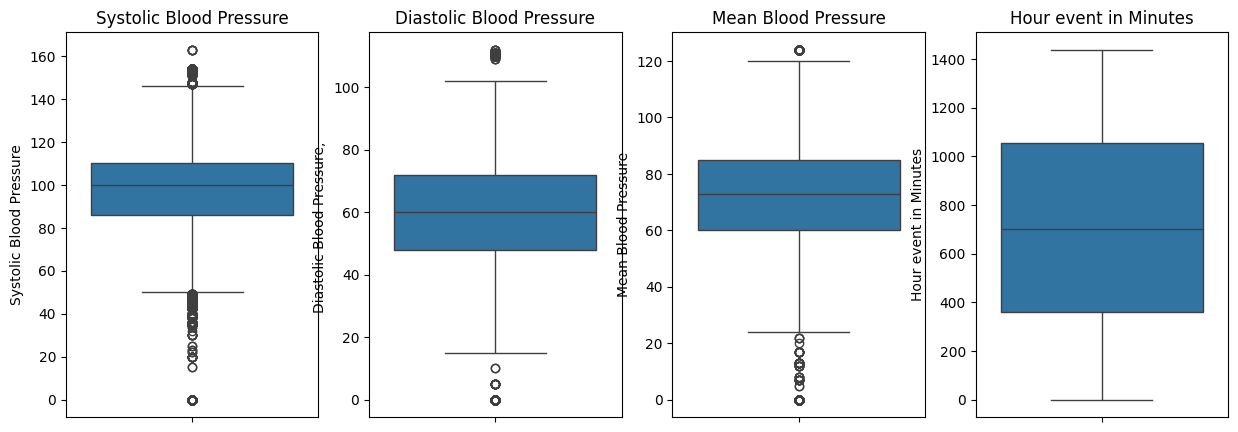

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(df['Systolic Blood Pressure'])
plt.title("Systolic Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df['Diastolic Blood Pressure, '])
plt.title("Diastolic Blood Pressure")

plt.subplot(1,4,3)
sns.boxplot(df['Mean Blood Pressure'])
plt.title("Mean Blood Pressure")

plt.subplot(1,4,4)
sns.boxplot(df['Hour event in Minutes'])
plt.title("Hour event in Minutes")


In [39]:
outliers=['Age','Weight (Kg)','Height (cms)','Systolic Blood Pressure','Diastolic Blood Pressure, ','Mean Blood Pressure']
other_cols=['oxygen saturation','Respiratory Rate']

In [40]:
for i in other_cols:
    max=df[i].max()
    print(len(df))
    df=df[df[i]!=max]
    print(len(df))

86138
86136
86136
86131


In [41]:
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    print("For column ",i," Q1 is ",q1," and Q3 is ",q3)
    print(len(df)-len(df[(df[i]>=q1-(1.5*iqr))&(df[i]<=q3+(1.5*iqr))]),f" is the number of outliers that is being removed from {i} column")
    df=df[(df[i]>=q1-(1.5*iqr))&(df[i]<=q3+(1.5*iqr))]

For column  Age  Q1 is  3.0  and Q3 is  7.0
10309  is the number of outliers that is being removed from Age column
For column  Weight (Kg)  Q1 is  5.0  and Q3 is  13.0
4773  is the number of outliers that is being removed from Weight (Kg) column
For column  Height (cms)  Q1 is  55.0  and Q3 is  100.0
0  is the number of outliers that is being removed from Height (cms) column
For column  Systolic Blood Pressure  Q1 is  84.0  and Q3 is  107.0
1692  is the number of outliers that is being removed from Systolic Blood Pressure column
For column  Diastolic Blood Pressure,   Q1 is  47.0  and Q3 is  69.0
24  is the number of outliers that is being removed from Diastolic Blood Pressure,  column
For column  Mean Blood Pressure  Q1 is  60.0  and Q3 is  81.0
6  is the number of outliers that is being removed from Mean Blood Pressure column


In [42]:
len(df)

69327

In [43]:
df['Outcome'].value_counts()

,count
Outcome,
0,52236
1,17091


In [44]:
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]
df_majority_undersampled = resample(df_majority,replace=False,n_samples=len(df_minority))
balanced_df = pd.concat([df_majority_undersampled, df_minority])

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
le=LabelEncoder()
sc=StandardScaler()

In [47]:
df['Diagnosis']=le.fit_transform(df['Diagnosis'])
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure,Hour event in Minutes
0,2,5.5,60.0,0,25,0,138,92,36,100,56,73,1132
1,2,5.5,60.0,0,25,0,142,92,31,99,53,69,1133
2,2,5.5,60.0,0,25,0,139,92,31,99,52,68,1134
3,2,5.5,60.0,0,25,0,142,92,29,97,51,66,1135
4,2,5.5,60.0,0,25,0,144,92,25,102,56,71,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94658,6,8.0,67.0,1,14,1,95,90,0,70,35,47,445
94659,6,8.0,67.0,1,14,1,99,88,0,72,36,48,446
94660,6,8.0,67.0,1,14,1,101,87,0,85,65,72,447
94661,6,8.0,67.0,1,14,1,103,88,0,94,30,51,448


In [48]:
balanced_df['Diagnosis']=le.fit_transform(balanced_df['Diagnosis'])

In [49]:
import joblib
joblib.dump(le,"le.pkl")

['le.pkl']

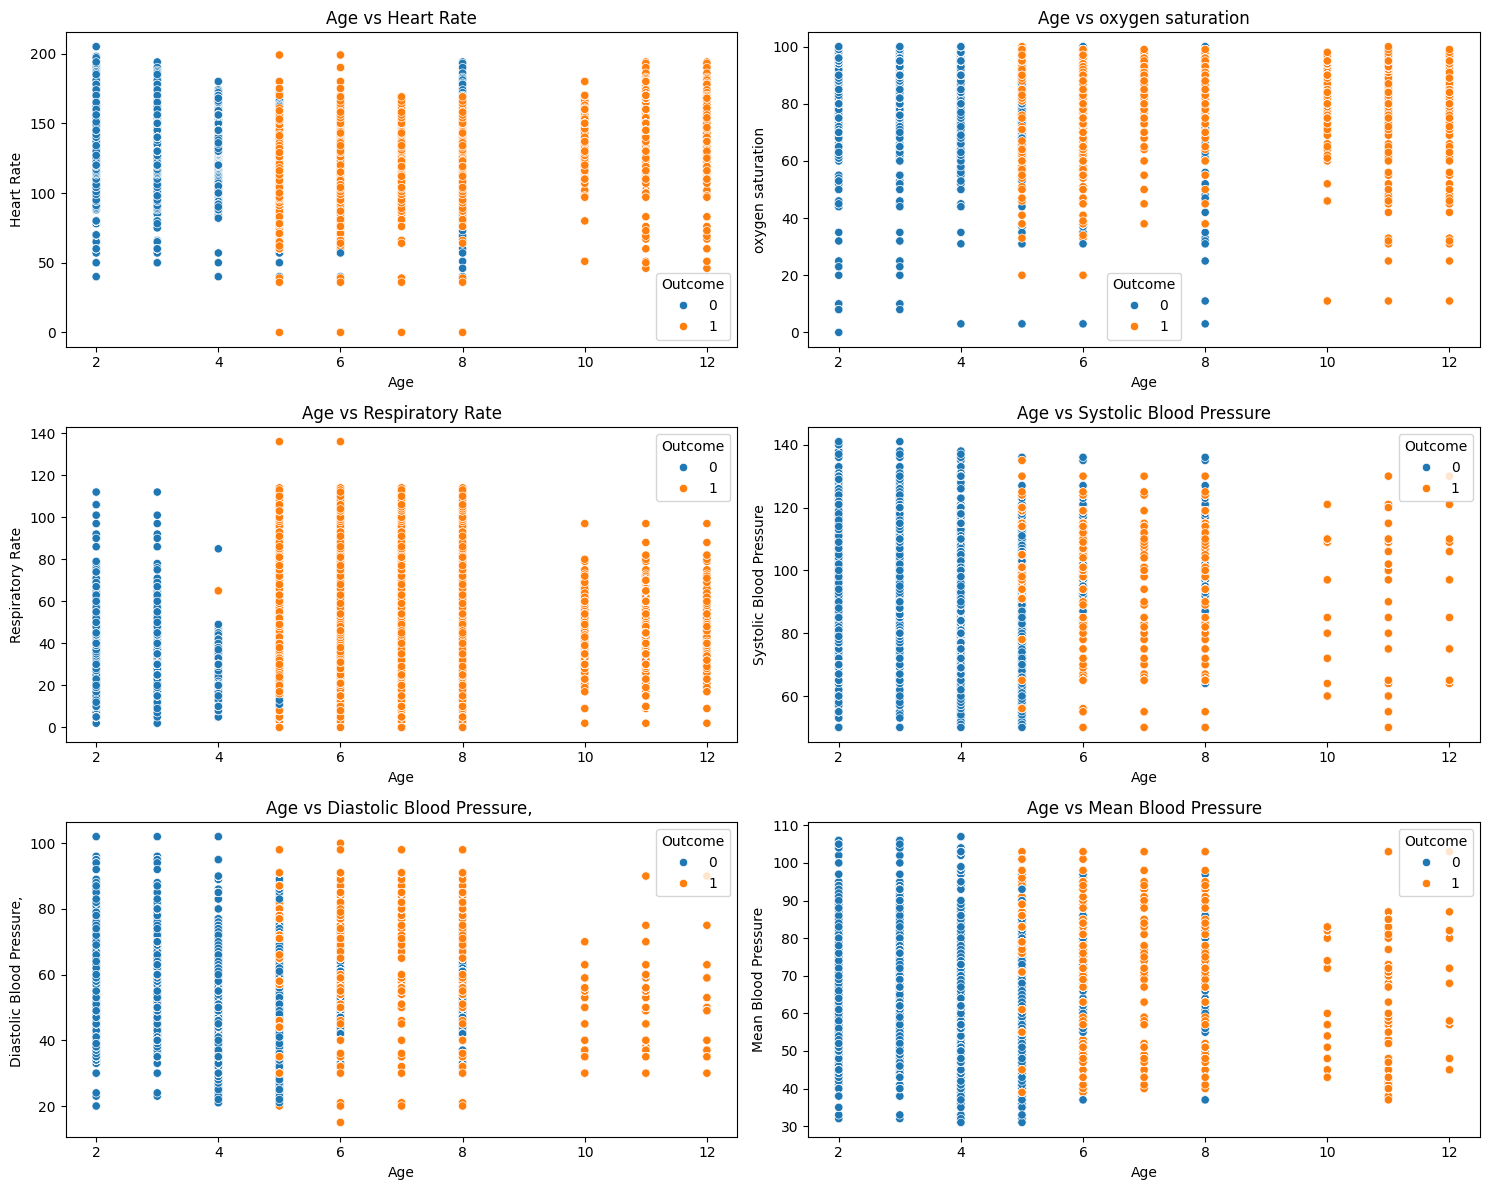

In [50]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(['Heart Rate', 'oxygen saturation', 'Respiratory Rate',
                         'Systolic Blood Pressure', 'Diastolic Blood Pressure, ', 'Mean Blood Pressure'], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x='Age', y=col, hue='Outcome')
    plt.title(f'Age vs {col}')
plt.tight_layout()
plt.show()

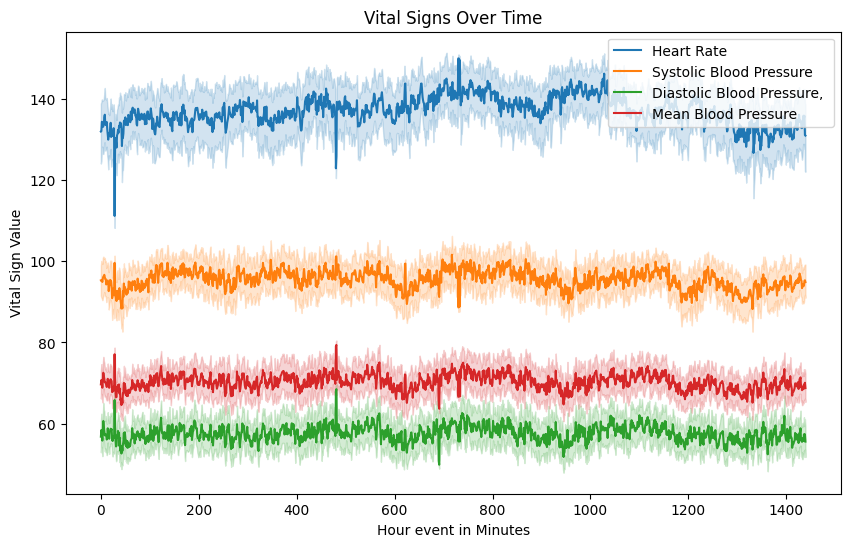

In [51]:
time_cols = ['Heart Rate', 'Systolic Blood Pressure', 'Diastolic Blood Pressure, ', 'Mean Blood Pressure']
plt.figure(figsize=(10, 6))
for col in time_cols:
    sns.lineplot(data=df, x='Hour event in Minutes', y=col, label=col)
plt.title('Vital Signs Over Time')
plt.xlabel('Hour event in Minutes')
plt.ylabel('Vital Sign Value')
plt.legend()
plt.show()

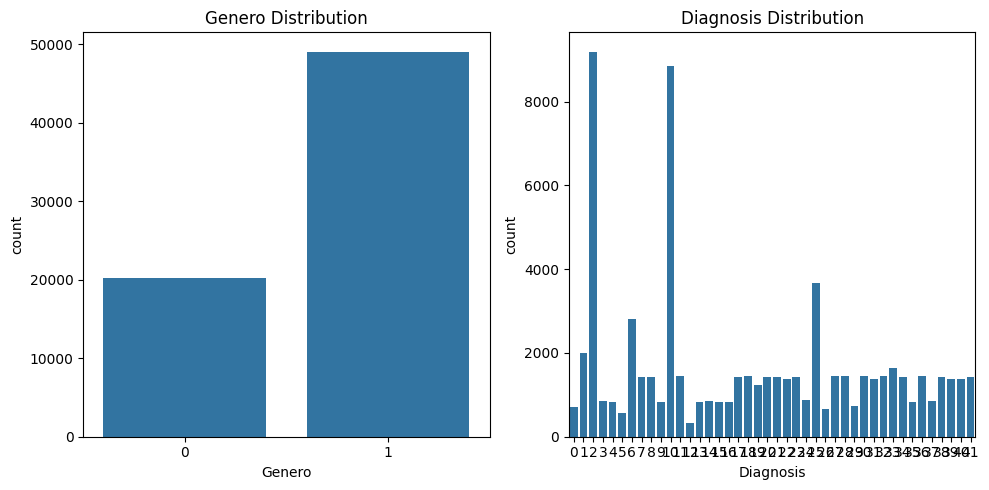

In [52]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(['Genero', 'Diagnosis'], 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [53]:
scaling_cols=list(df.columns)
scaling_cols

['Age',
 'Weight (Kg)',
 'Height (cms)',
 'Genero',
 'Diagnosis',
 'Outcome',
 'Heart Rate',
 'oxygen saturation',
 'Respiratory Rate',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure, ',
 'Mean Blood Pressure',
 'Hour event in Minutes']

In [54]:
scaling_cols.remove("Outcome")
scaling_cols

['Age',
 'Weight (Kg)',
 'Height (cms)',
 'Genero',
 'Diagnosis',
 'Heart Rate',
 'oxygen saturation',
 'Respiratory Rate',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure, ',
 'Mean Blood Pressure',
 'Hour event in Minutes']

In [55]:
df[scaling_cols]=sc.fit_transform(df[scaling_cols])

In [56]:
df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure,Hour event in Minutes
0,-1.188790,-0.688737,-0.593907,-1.557320,0.582889,0,0.033033,-0.022651,0.403664,0.284027,-0.114505,0.192649,1.033255
1,-1.188790,-0.688737,-0.593907,-1.557320,0.582889,0,0.204663,-0.022651,0.028991,0.219867,-0.321421,-0.095858,1.035702
2,-1.188790,-0.688737,-0.593907,-1.557320,0.582889,0,0.075940,-0.022651,0.028991,0.219867,-0.390393,-0.167985,1.038150
3,-1.188790,-0.688737,-0.593907,-1.557320,0.582889,0,0.204663,-0.022651,-0.120879,0.091547,-0.459365,-0.312239,1.040598
4,-1.188790,-0.688737,-0.593907,-1.557320,0.582889,0,0.290478,-0.022651,-0.420618,0.412347,-0.114505,0.048396,1.043045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94658,0.756101,-0.084092,-0.276738,0.642129,-0.296198,1,-1.811990,-0.269927,-2.293986,-1.640771,-1.562919,-1.682648,-0.648274
94659,0.756101,-0.084092,-0.276738,0.642129,-0.296198,1,-1.640360,-0.517203,-2.293986,-1.512451,-1.493947,-1.610521,-0.645826
94660,0.756101,-0.084092,-0.276738,0.642129,-0.296198,1,-1.554545,-0.640841,-2.293986,-0.678372,0.506244,0.120522,-0.643379
94661,0.756101,-0.084092,-0.276738,0.642129,-0.296198,1,-1.468730,-0.517203,-2.293986,-0.100933,-1.907780,-1.394141,-0.640931


In [57]:
balanced_df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure,Hour event in Minutes
64244,2,11.0,95.0,0,39,0,173,98,50,106,69,81,140
4238,4,5.0,52.0,1,7,0,159,95,30,83,50,61,338
1655,5,4.0,45.0,1,18,0,163,99,26,119,73,88,702
56076,4,5.5,60.0,0,17,0,137,52,29,65,36,46,240
33063,4,6.0,62.0,1,2,0,156,100,9,130,95,107,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94658,6,8.0,67.0,1,14,1,95,90,0,70,35,47,445
94659,6,8.0,67.0,1,14,1,99,88,0,72,36,48,446
94660,6,8.0,67.0,1,14,1,101,87,0,85,65,72,447
94661,6,8.0,67.0,1,14,1,103,88,0,94,30,51,448


In [58]:
testing=pd.DataFrame(balanced_df.iloc[0]).T
testing.to_csv("testing.csv",index=False)

In [59]:
balanced_df[scaling_cols]=sc.fit_transform(balanced_df[scaling_cols])

In [60]:
joblib.dump(sc,"sc.pkl")

['sc.pkl']

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import chi2

def FS_KBest(df):
    col_list = []
    for col in df.columns:
        if ((df[col].dtype != 'object') & (col != 'Outcome')):
            col_list.append(col)

    xx = df[col_list]
    yy = df['Outcome']
    fs = SelectKBest(score_func=f_classif, k=7)

    X_selected = fs.fit_transform(xx, yy)

    l = list(xx.columns)
    for i in range(0, len(l)):
        print(f"{i} = {l[i]}")

    return fs.get_support(True)

FS_KBest(df)

0 = Age
1 = Weight (Kg)
2 = Height (cms)
3 = Genero
4 = Diagnosis
5 = Heart Rate
6 = oxygen saturation
7 = Respiratory Rate
8 = Systolic Blood Pressure
9 = Diastolic Blood Pressure, 
10 = Mean Blood Pressure
11 = Hour event in Minutes


array([ 0,  1,  4,  5,  7,  9, 10])

 # Div 3

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [63]:
X=balanced_df.drop(columns=['Outcome'])
Y=balanced_df['Outcome']

In [64]:
balanced_df

,Age,Weight (Kg),Height (cms),Genero,Diagnosis,Outcome,Heart Rate,oxygen saturation,Respiratory Rate,Systolic Blood Pressure,"Diastolic Blood Pressure,",Mean Blood Pressure,Hour event in Minutes
64244,-1.385506,0.497185,0.898815,-1.768407,1.939737,0,1.446444,0.707840,1.009291,0.604333,0.577061,0.604844,-1.355599
4238,-0.523910,-0.874163,-1.096141,0.565481,-0.696756,0,0.930312,0.348849,-0.198382,-0.834099,-0.632681,-0.753610,-0.874658
1655,-0.093111,-1.102721,-1.420902,0.565481,0.209539,0,1.077778,0.827504,-0.439916,1.417360,0.831743,1.080303,0.009498
56076,-0.523910,-0.759884,-0.724986,-1.768407,0.127148,0,0.119247,-4.796689,-0.258765,-1.959828,-1.524069,-1.772450,-1.112700
33063,-0.523910,-0.645605,-0.632198,0.565481,-1.108708,0,0.819712,0.947168,-1.466438,2.105306,2.232496,2.370834,-0.517595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94658,0.337687,-0.188489,-0.400226,0.565481,-0.120023,1,-1.429148,-0.249469,-2.009891,-1.647125,-1.587740,-1.704527,-0.614755
94659,0.337687,-0.188489,-0.400226,0.565481,-0.120023,1,-1.281682,-0.488797,-2.009891,-1.522044,-1.524069,-1.636604,-0.612326
94660,0.337687,-0.188489,-0.400226,0.565481,-0.120023,1,-1.207949,-0.608460,-2.009891,-0.709018,0.322378,-0.006460,-0.609897
94661,0.337687,-0.188489,-0.400226,0.565481,-0.120023,1,-1.134216,-0.488797,-2.009891,-0.146153,-1.906093,-1.432836,-0.607468


In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [66]:
len(x_train),len(y_test)

(27345, 6837)

In [67]:
lr1=LogisticRegression()
start_time=time.time()
lr1.fit(x_train,y_train)
end_time=time.time()
lrt=end_time-start_time
lr1_pred=lr1.predict(x_test)
print("Accuracy of Logistic Regression:",accuracy_score(lr1_pred,y_test))
print(classification_report(lr1_pred,y_test))

Accuracy of Logistic Regression: 0.9452976451660084
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3441
           1       0.94      0.95      0.95      3396

    accuracy                           0.95      6837
   macro avg       0.95      0.95      0.95      6837
weighted avg       0.95      0.95      0.95      6837



In [68]:
dt1=DecisionTreeClassifier()
start_time=time.time()
dt1.fit(x_train,y_train)
end_time=time.time()
dtt=end_time-start_time
dt1_pred=dt1.predict(x_test)
print("Accuracy of Decision Tree:",accuracy_score(dt1_pred,y_test))
print(classification_report(dt1_pred,y_test))

Accuracy of Decision Tree: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3419
           1       1.00      1.00      1.00      3418

    accuracy                           1.00      6837
   macro avg       1.00      1.00      1.00      6837
weighted avg       1.00      1.00      1.00      6837



In [69]:
rf1=RandomForestClassifier()
start_time=time.time()
rf1.fit(x_train,y_train)
end_time=time.time()
rft=end_time-start_time
rf1_pred=rf1.predict(x_test)
print("Accuracy of Random Forest:",accuracy_score(rf1_pred,y_test))
print(classification_report(rf1_pred,y_test))

Accuracy of Random Forest: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3419
           1       1.00      1.00      1.00      3418

    accuracy                           1.00      6837
   macro avg       1.00      1.00      1.00      6837
weighted avg       1.00      1.00      1.00      6837



In [70]:
KNN1=KNeighborsClassifier()
start_time=time.time()
KNN1.fit(x_train,y_train)
end_time=time.time()
KNNt=end_time-start_time
KNN1_pred=KNN1.predict(x_test)
print("Accuracy of KNN:",accuracy_score(KNN1_pred,y_test))
print(classification_report(KNN1_pred,y_test))

Accuracy of KNN: 0.9978060552874067
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3418
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6837
   macro avg       1.00      1.00      1.00      6837
weighted avg       1.00      1.00      1.00      6837



In [71]:
GNB1=GaussianNB()
start_time=time.time()
GNB1.fit(x_train,y_train)
end_time=time.time()
GNBt=end_time-start_time
GNB1_pred=GNB1.predict(x_test)
print("Accuracy of GNB:",accuracy_score(GNB1_pred,y_test))
print(classification_report(GNB1_pred,y_test))

Accuracy of GNB: 0.9254058797718298
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3347
           1       0.94      0.92      0.93      3490

    accuracy                           0.93      6837
   macro avg       0.93      0.93      0.93      6837
weighted avg       0.93      0.93      0.93      6837



In [72]:
svm1=SVC()
start_time=time.time()
svm1.fit(x_train,y_train)
end_time=time.time()
svmt=end_time-start_time
svm1_pred=svm1.predict(x_test)
print("Accuracy of SVM:",accuracy_score(svm1_pred,y_test))
print(classification_report(svm1_pred,y_test))

Accuracy of SVM: 0.9961971624981717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3415
           1       1.00      1.00      1.00      3422

    accuracy                           1.00      6837
   macro avg       1.00      1.00      1.00      6837
weighted avg       1.00      1.00      1.00      6837



In [73]:
results_df={"Algorithm":['Logistic Regression',"SVM",'Decision Tree','Random Forest','KNN','GNB'],"Accuracy":[accuracy_score(lr1_pred,y_test),accuracy_score(svm1_pred,y_test),accuracy_score(dt1_pred,y_test),accuracy_score(rf1_pred,y_test),accuracy_score(KNN1_pred,y_test),accuracy_score(GNB1_pred,y_test)],
            "Recall":[recall_score(lr1_pred,y_test),recall_score(svm1_pred,y_test),recall_score(dt1_pred,y_test),recall_score(rf1_pred,y_test),recall_score(KNN1_pred,y_test),recall_score(GNB1_pred,y_test)],
            "Precision":[precision_score(lr1_pred,y_test),precision_score(svm1_pred,y_test),precision_score(dt1_pred,y_test),precision_score(rf1_pred,y_test),precision_score(KNN1_pred,y_test),precision_score(GNB1_pred,y_test)],
           "F1-Score":[f1_score(lr1_pred,y_test),f1_score(svm1_pred,y_test),f1_score(dt1_pred,y_test),f1_score(rf1_pred,y_test),f1_score(KNN1_pred,y_test),f1_score(GNB1_pred,y_test)]}
results_df=pd.DataFrame(results_df)
results_df

,Algorithm,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.945298,0.948174,0.942071,0.945113
1,SVM,0.996197,0.995617,0.996782,0.996199
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000
4,KNN,0.997806,0.997660,0.997952,0.997806
5,GNB,0.925406,0.916619,0.935927,0.926173


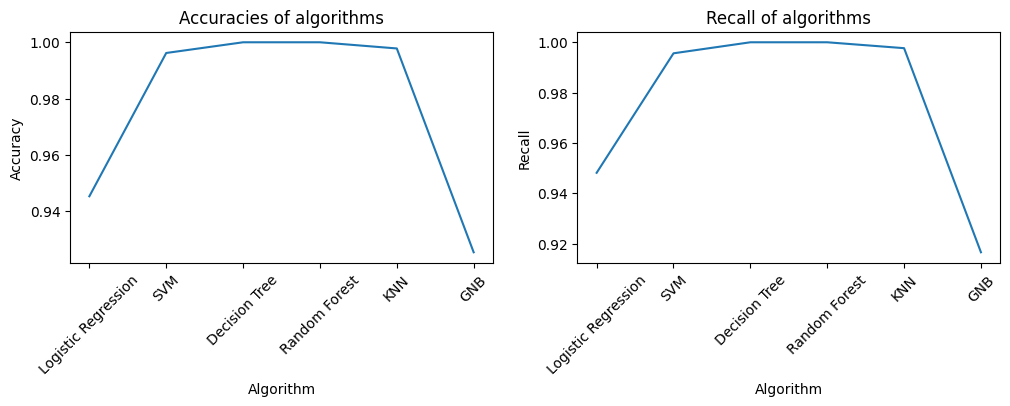

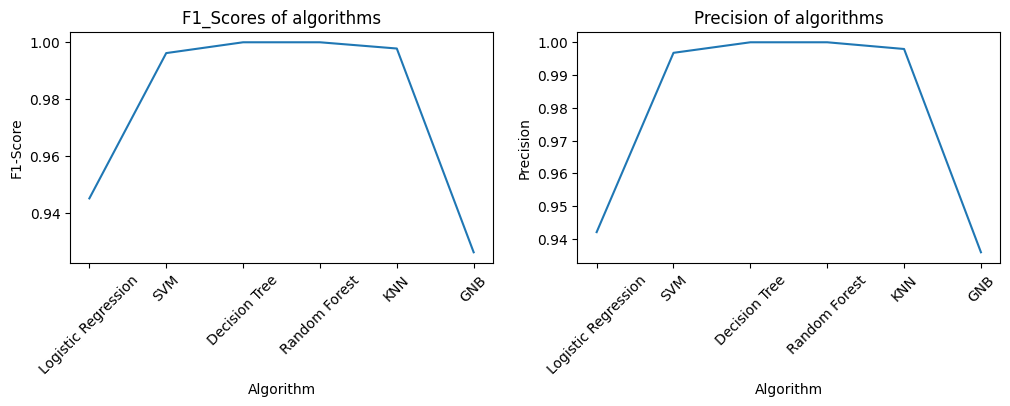

In [74]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("Accuracies of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Accuracy'])

plt.subplot(1,2,2)
plt.title("Recall of algorithms")
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Recall'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("F1_Scores of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['F1-Score'])

plt.subplot(1,2,2)
plt.title("Precision of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Precision'])
plt.show()

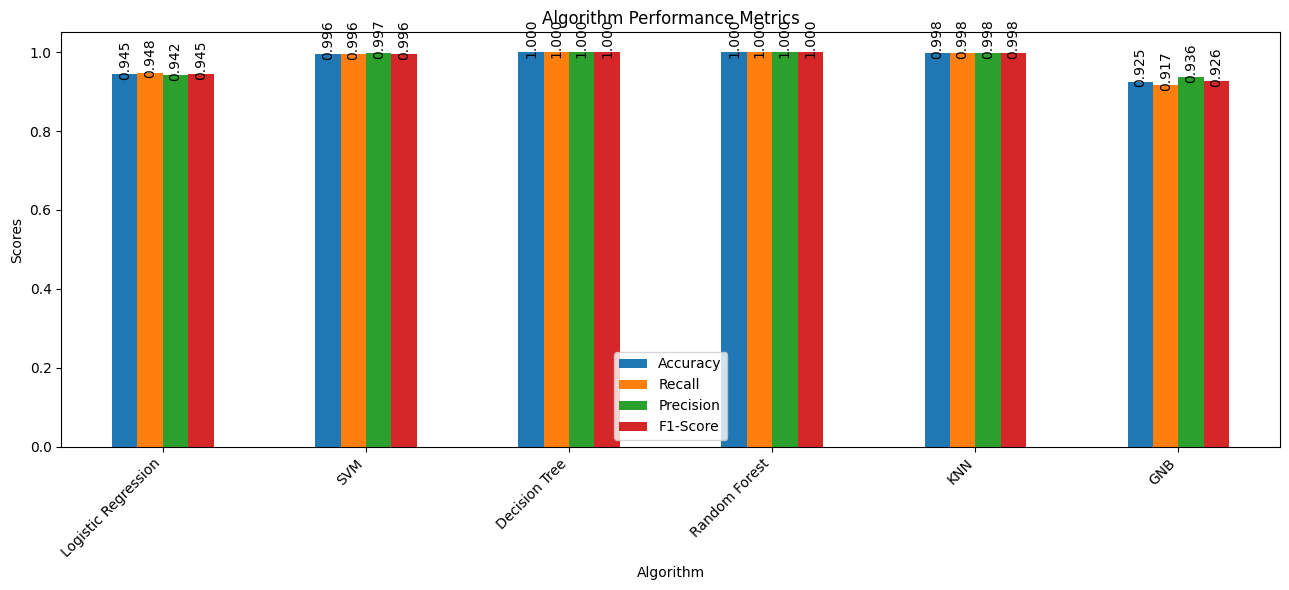

In [75]:
ax=results_df.set_index('Algorithm').plot(kind='bar', figsize=(13, 6))

plt.ylabel('Scores')
plt.title('Algorithm Performance Metrics')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=90)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [76]:
print("Confusion Matrix of Logistic Regression ")
lr1_cm=pd.DataFrame(confusion_matrix(lr1_pred,y_test))
print(lr1_cm)
print("Confusion Matrix of Decision Tree ")
dt1_cm=pd.DataFrame(confusion_matrix(dt1_pred,y_test))
print(dt1_cm)
print("Confusion Matrix of Random Forest ")
rf1_cm=pd.DataFrame(confusion_matrix(rf1_pred,y_test))
print(rf1_cm)
print("Confusion Matrix of SVM ")
svm1_cm=pd.DataFrame(confusion_matrix(svm1_pred,y_test))
print(svm1_cm)
print("Confusion Matrix of KNN ")
KNN1_cm=pd.DataFrame(confusion_matrix(KNN1_pred,y_test))
print(KNN1_cm)
print("Confusion Matrix of GNB ")
GNB1_cm=pd.DataFrame(confusion_matrix(GNB1_pred,y_test))
print(GNB1_cm)

Confusion Matrix of Logistic Regression 
      0     1
0  3243   198
1   176  3220
Confusion Matrix of Decision Tree 
      0     1
0  3419     0
1     0  3418
Confusion Matrix of Random Forest 
      0     1
0  3419     0
1     0  3418
Confusion Matrix of SVM 
      0     1
0  3404    11
1    15  3407
Confusion Matrix of KNN 
      0     1
0  3411     7
1     8  3411
Confusion Matrix of GNB 
      0     1
0  3128   219
1   291  3199


In [77]:
time_df={"Algorithm":['Logistic Regression',"SVM",'Decision Tree','Random Forest','KNN','GNB'],
         "Execution Time in Seconds":[lrt,svmt,dtt,rft,KNNt,GNBt]}
time_df=pd.DataFrame(time_df)
time_df

,Algorithm,Execution Time in Seconds
0,Logistic Regression,0.062909
1,SVM,2.817722
2,Decision Tree,0.053903
3,Random Forest,2.016617
4,KNN,0.058110
5,GNB,0.013362


Text(0.5, 1.0, 'Time Taken For Model Training')

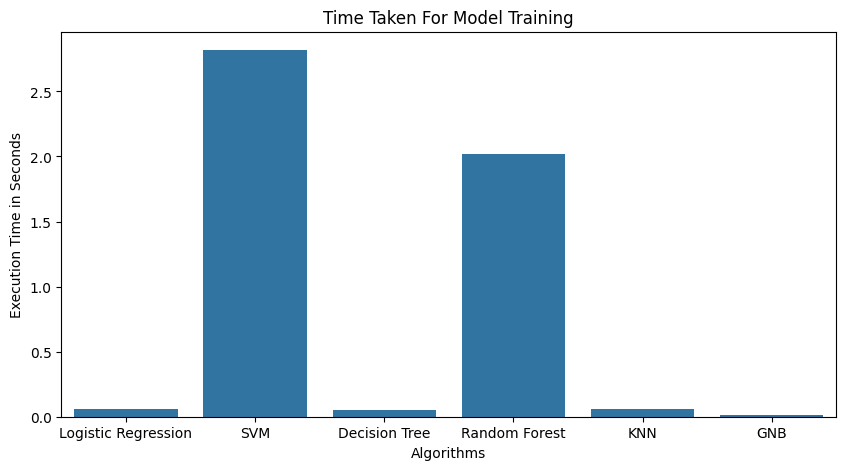

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(data=time_df,x=time_df['Algorithm'],y=time_df['Execution Time in Seconds'])
plt.xlabel("Algorithms")
plt.ylabel("Execution Time in Seconds")
plt.title("Time Taken For Model Training")

In [79]:
joblib.dump(dt1,"dt1.pkl")

['dt1.pkl']

In [80]:
#Testing
testing=pd.read_csv("testing.csv")
scaling_cols=['Age',
 'Weight (Kg)',
 'Height (cms)',
 'Genero',
 'Diagnosis',
 'Heart Rate',
 'oxygen saturation',
 'Respiratory Rate',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure, ',
 'Mean Blood Pressure',
 'Hour event in Minutes']
scaled_values = sc.transform(testing[scaling_cols])
scaled_df = pd.DataFrame(scaled_values, columns=scaling_cols)
testing[scaling_cols] = scaled_df
testing.drop(columns='Outcome',inplace=True)
dt1.predict(testing)

array([0])